In [91]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='dark', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [92]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, silhouette_score 
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA

In [93]:
data = pd.read_csv(r'c:\Github\Sol\the_data\data-lab-3-insurance.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
mis_val = data.isna().sum() * 100/len(data)
mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [95]:
data.duplicated().sum()

data.drop_duplicates(keep='first', ignore_index=False, subset=None, inplace=True)

data.duplicated().sum()

0

In [96]:
orig_reg = data.region 

le = LabelEncoder()

data.sex = le.fit_transform(data.sex)
data.region = le.fit_transform(data.region)
data.smoker = le.fit_transform(data.smoker)

In [97]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.924


In [98]:
le_reg = data.region 

orig_reg_dic = np.unique(orig_reg)
le_reg_dic = np.unique(le_reg)

reg_dict = dict(zip(orig_reg_dic,le_reg_dic))
reg_dict

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}

<AxesSubplot:title={'center':'Correlation Matrix'}>

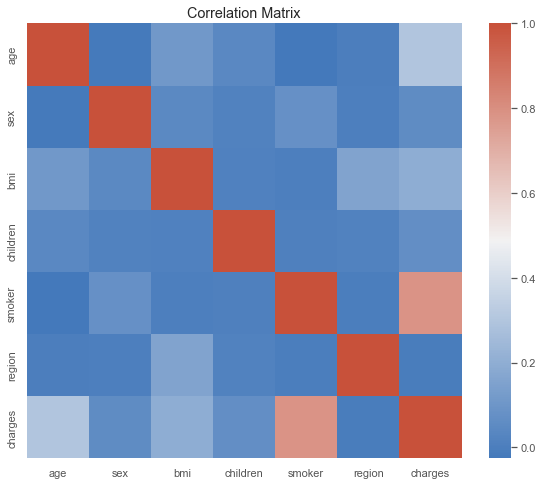

In [99]:
data_corr = data.corr()

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(250,18, as_cmap=True), ax=ax, square=True)

In [100]:
y = data.charges 
x = data.drop(columns=['charges'])
# x.head(1)

In [101]:
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x))
y = scaler.fit_transform(np.array(y).reshape(-1,1))
y

array([[ 0.2978567 ],
       [-0.9543806 ],
       [-0.72937251],
       ...,
       [-0.96228744],
       [-0.9310536 ],
       [ 1.31029752]])

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.3)

In [103]:
linreg = LinearRegression()

linreg.fit(x_train,y_train)

y_true = y_test 
y_pred = linreg.predict(x_test)

scr_r2 = r2_score(y_true,y_pred).round(3)
mse_scr = mean_squared_error(y_true,y_pred).round(3)

mod_perf = pd.DataFrame( 
    [ 
        'LinearRegression', scr_r2,mse_scr
    ]
).transpose()
mod_perf.columns = ['Method', 'Test R2', 'Test Mse']

mod_perf

,Method,Test R2,Test Mse
0,LinearRegression,0.772,0.266


In [104]:
ranfor = RandomForestRegressor(n_estimators=100, n_jobs=-1, criterion='squared_error', random_state=42)

ranfor.fit(x_train,y_train)

y_true = y_test 
y_pred = ranfor.predict(x_test)

scr_mse = mean_squared_error(y_true,y_pred)
scr_mse

C:\Users\amunv\AppData\Local\Temp\ipykernel_3816\3378125315.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.16022808818194853